# Temporal Series Project
## Table of contents

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
    * [3.1 Drop Null Values](#c3-1)
    * [3.2 Drop Duplicate Information](#c3-2)
    * [3.2 Drop Irrelevant Information](#c3-3)
* [4. Temporal Series Analysis](#c4)
    * [4.1 Tensor Analysis](#c4-1)
    * [4.2 Trend Analysis](#c4-2)
    * [4.3 Stationarity](#c4-3)
    * [4.4 Variability](#c4-4)
    * [4.5 Autocorrelation](#c4-5)
* [5. Machine Learning](#c5)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to analyze the rithm of sales since the company foundation and to create a model to predict future results in order to properly dimension the warehouse space required.

## 1. Importing libraries <a id='c1'></a>

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [60]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)
print(total_data.head())
ts = total_data['sales']

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [50]:
total_data.isna().sum()

date     0
sales    0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

Since there is no duplicated rows we won't delete any data

In [62]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} of {rows} rows duplicated')

We have 0 of 366 rows duplicated


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

Since all data is relevant, we don't delete any column

## 4. Temporal Series Analysis <a id='c4'></a>

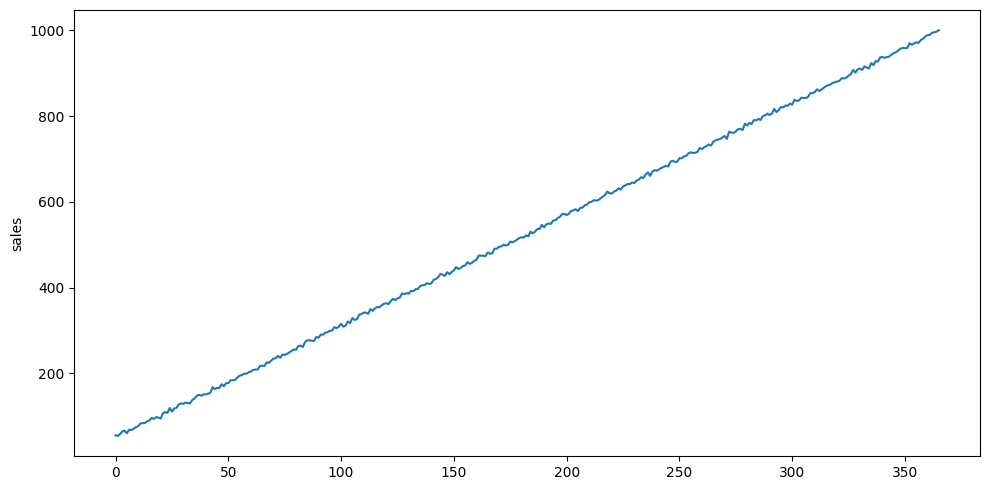

In [52]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()
plt.show()

### 4.1 Tensor Analysis <a id='c4-1'></a>

In [63]:
tensor = 30
decomposition = seasonal_decompose(ts, period = tensor)
decomposition

We've determined 30 as the values of the **tensor** as the sales date are registered every day.

#### 4.2 Tendencie Analysis <a id='c4-2'></a>

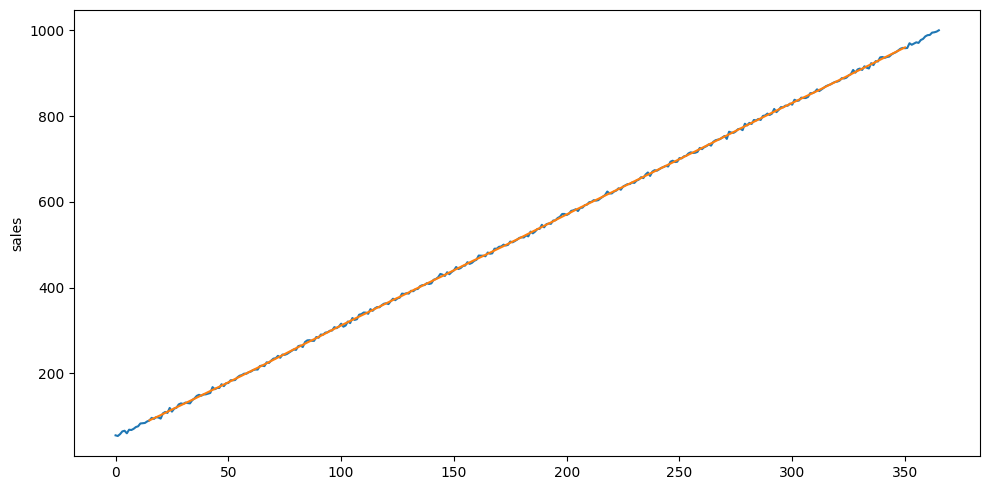

In [54]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

The trend of the temporal series sales shows a *lineal and positive* sales growth over time. This suggest that the series wouldn't be stational since it's properties such as mean or variance will change in the next future.

### 4.3 Stationallity <a id='c4-3'></a>

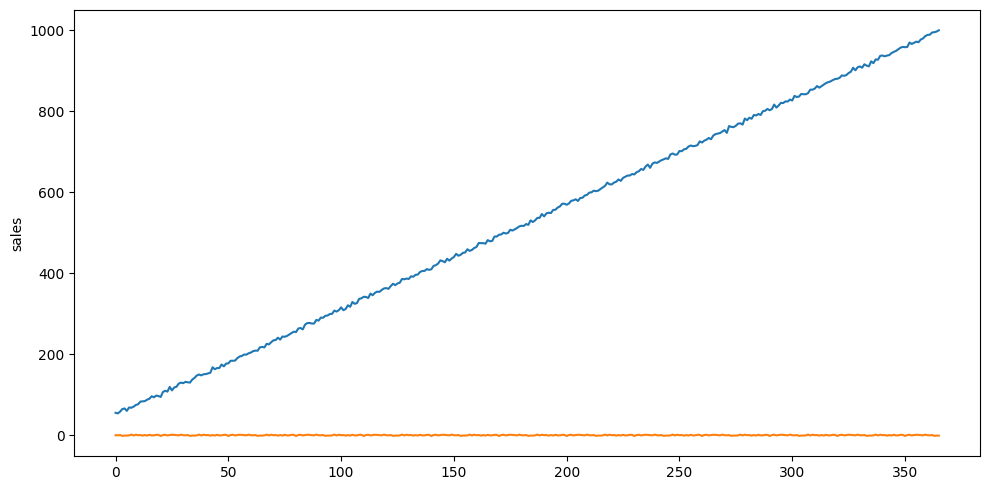

In [55]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [64]:
def test_stationarity(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Results of Dickey-Fuller Test:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

As shown in the plot and the test we can conclude that the temporal serie *isn't stationary*.
As the p-value is higher than 0.05 we can't decline the nule hypothesis (H0).

## 4.4 Variability <a id='c4-4'></a>

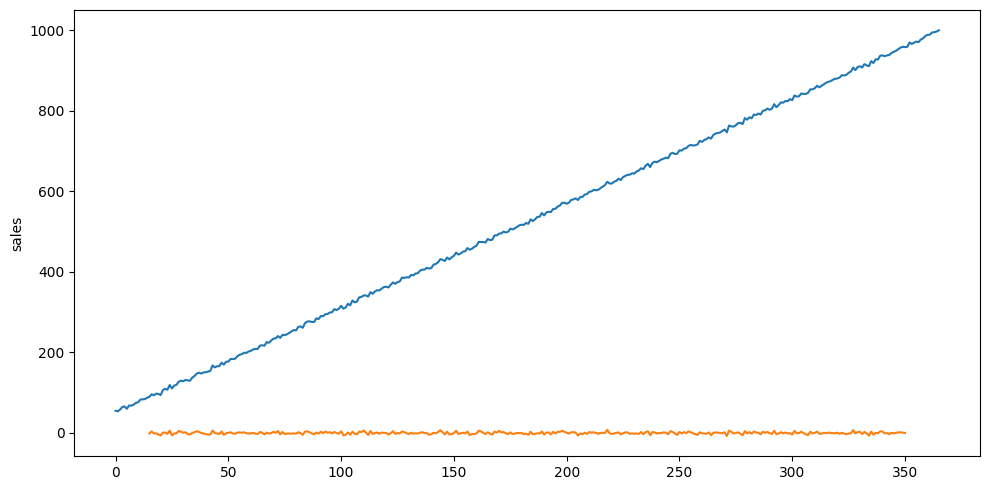

In [ ]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Based on this **variability** plot, the residuals are *constant* over time. This indicates that unpredictable data is not increasing or decreasing.

### 4.5 Autocorrelation <a id='c4-5'></a>

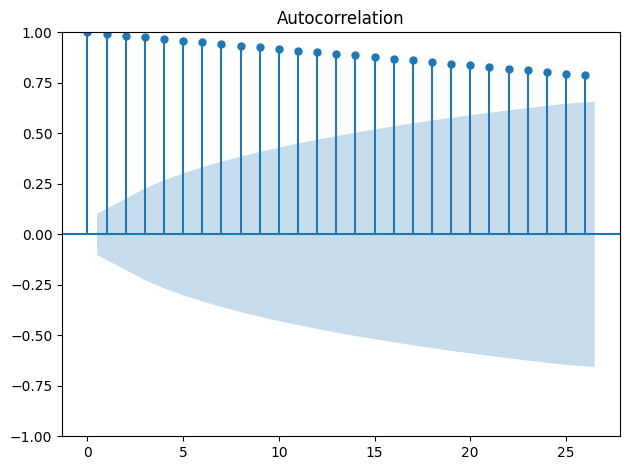

In [58]:
plot_acf(ts)

plt.tight_layout()

plt.show()

We have a strong dependence on its past values which slightly decreases over time.

## 5. Machine Learning <a id='c5'></a>